# Zoolog

Zoolog, penguen türlerini tanıma konusunda uzmandır. Uzmanımızın adlandırabildiği 3 penguen türü şunlardır:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Peki siz onları ayırt edebiliyor musunuz?


In [24]:
import pandas as pd
penguins = pd.read_csv("penguins.csv")

In [29]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [30]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [27]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [28]:
penguins.dropna(inplace=True)
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

❓Penguenlerin özellikleri nelerdir?

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

In [31]:
species = penguins["species"].value_counts()
species

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [33]:
penguins.groupby("species").size()

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64

##  Veri görselleştirme (Data visualization)

‘bill_length_mm’ vs ‘bill_depth_mm’

In [34]:
import matplotlib.pyplot as plt

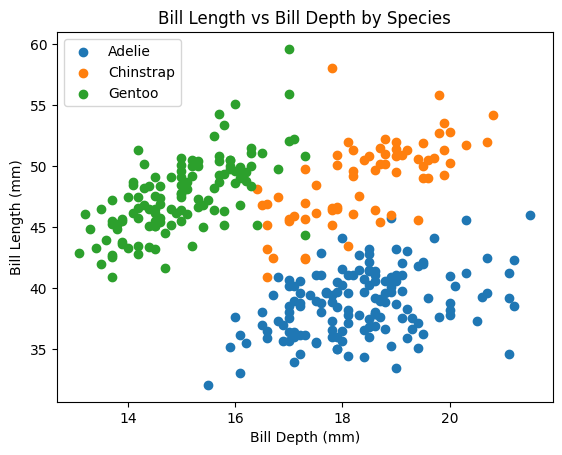

In [36]:
# Plot each species separately
for sp in penguins["species"].unique():
    subset = penguins[penguins["species"] == sp]
    plt.scatter(
        subset["bill_depth_mm"],
        subset["bill_length_mm"],
        label=sp
    )

plt.xlabel("Bill Depth (mm)")
plt.ylabel("Bill Length (mm)")
plt.title("Bill Length vs Bill Depth by Species")
plt.legend()
plt.show()

**gentoo** türü, diğer 2 türe göre açıkça daha uzun yüzgeçlere sahip gibi görünüyor.

## Modelleme

Çoklu sınıf sorununu çözmek için iki strateji vardır:

- Bire bir (One vs One)
- Bire tüm (Bire geri kalan)(One vs All)


### One vs One
- Dataset içindeki **her bir sınıf çifti için bir model** eğitilir
- Tahmin aşamasında, **en fazla oyu alan sınıf** seçilir

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍 Sınıf çiftlerine özgü farkları dikkate alır


👎 Çok sayıda alt model oluşturur: hesaplama açısından maliyetlidir


### One vs Rest (One vs All)

- **Her bir sınıf için**, diğer tüm sınıflara karşı **tek bir model** eğitilir
- Tahmin aşamasında, **en yüksek olasılığa sahip sınıf** seçilir

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍 Hesaplama açısından daha az maliyetlidir


👎 Sınıfların bir araya getirilmesiyle, sınıf çiftlerine özgü farklar kaybolur ve etkileri azalır

## One vs Rest

In [40]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [51]:
### Preparing data ###
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

# Drop rows with missing values
mask = X.notna().all(axis=1)
X = X[mask]
y = y[mask]

# Build the model
ovr_log_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Cross validation
ovr_cv_results = cross_validate(model, X, y, cv=KFold(shuffle=True, random_state=42))

ovr_cv_results['test_score'].mean()

np.float64(0.9819990954319312)

## One vs One

In [52]:
from sklearn.multiclass import OneVsOneClassifier

In [53]:
# Build the model
ovo_log_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))

# Cross validation
ovo_cv_results = cross_validate(model, X, y, cv=KFold(shuffle=True, random_state=42))

ovo_cv_results['test_score'].mean()

np.float64(0.9819990954319312)

In [56]:
ovo_cv_results["fit_time"].sum() + ovo_cv_results["score_time"].sum()

np.float64(0.04553723335266113)

ℹ️ Her iki modelin de çok benzer doğruluklara sahip olduğunu görüyoruz. Neden? <br><br>
Öncelikle, her iki model de sınıflandırması görece kolay olan bir dataset üzerinde oldukça iyi bir performans sergiliyor. İkinci olarak, ayırt edilmesi gereken yalnızca üç sınıf olduğunda, hem OvO hem de OvR yaklaşımları aslında **3 adet alt modelin** eğitilmesiyle sonuçlanır! Bu nedenle, çok benzer doğruluklar elde etmemiz beklenir.

Zoolog, 10 denemenin 9’unda doğru türü bulabiliyor; biz bunu algoritmamız ile geçtik!!

# 🏁 